# Visualisation of the first Szene

The Goal is, to show our logic and definition of a playmaker.
The definition are follows:
 - Who created the biggest Space in the opponetn Defends
 - Who is nearer to the Goal

In [463]:
import pandas as pd
import hockey_rink as hr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [464]:
df = pd.read_csv('../data/CleanData/2_Drittel_988_1001.csv')

In [465]:
df.head()

,Unnamed: 0,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,...,StartPlayerDirection3,StartPlayerDirection4,StartPlayerDirection5,StartPlayerDirection6,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12
0,2649,2,988,1704026093174,Goal,AwayPowerplay,4v5,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2650,2,988,1704026093360,PuckControl,AwayPowerplay,4v5,True,True,HomeTeamZone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2651,2,988,1704026094020,StoppageOfPlay,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2652,2,988,1704026142900,Faceoff,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2653,2,988,1704026142900,PuckControl,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [466]:
# each row has a column EventStartCoordinate and EventEndCoordinate which if applicable, contains the x and y coordinates of the event.
# these columns need to be split into two columns, one for x and one for y
df[['EventStartX', 'EventStartY']] = df['EventStartCoordinate'].str.split(',', expand=True)
df[['EventEndX', 'EventEndY']] = df['EventEndCoordinate'].str.split(',', expand=True)

In [467]:
# convert the columns to numeric
df['EventStartX'] = pd.to_numeric(df['EventStartX'])
df['EventStartY'] = pd.to_numeric(df['EventStartY'])
df['EventEndX'] = pd.to_numeric(df['EventEndX'])
df['EventEndY'] = pd.to_numeric(df['EventEndY'])


In [468]:
df.head()

,Unnamed: 0,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,...,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY
0,2649,2,988,1704026093174,Goal,AwayPowerplay,4v5,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2650,2,988,1704026093360,PuckControl,AwayPowerplay,4v5,True,True,HomeTeamZone,...,NaN,NaN,NaN,NaN,NaN,NaN,-27.4,-1.0,-27.1,0.1
2,2651,2,988,1704026094020,StoppageOfPlay,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2652,2,988,1704026142900,Faceoff,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2653,2,988,1704026142900,PuckControl,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,0.0,6.1,-1.2


In [469]:
# create a rink object
rink = hr.IIHFRink()

In [470]:
# convert the x and y coordinates to the rink coordinates using the rink.convert method
# the coordinates of the board in the hockey_rink package for the IIHF rink are length 197 and width 98.4
df['RinkX'], df['RinkY'] = rink.convert_xy(df['EventStartX'] * 3.2833 , df['EventStartY']*3.28)


In [471]:
shots = df[df['EventType'] == 'Shot']

In [472]:
passE = df[df['EventType'] == 'Pass']

In [473]:
crossings = df[df['EventType'] == 'BluelineCrossing']

<Axes: xlabel='RinkX', ylabel='RinkY'>

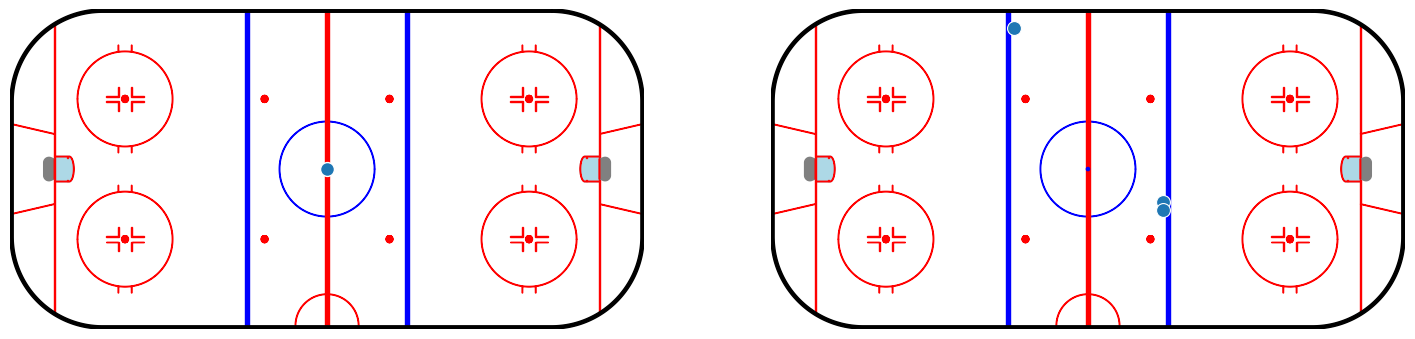

In [474]:
# plot the corssings on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=crossings, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=crossings, ax=axs[1])

<Axes: xlabel='RinkX', ylabel='RinkY'>

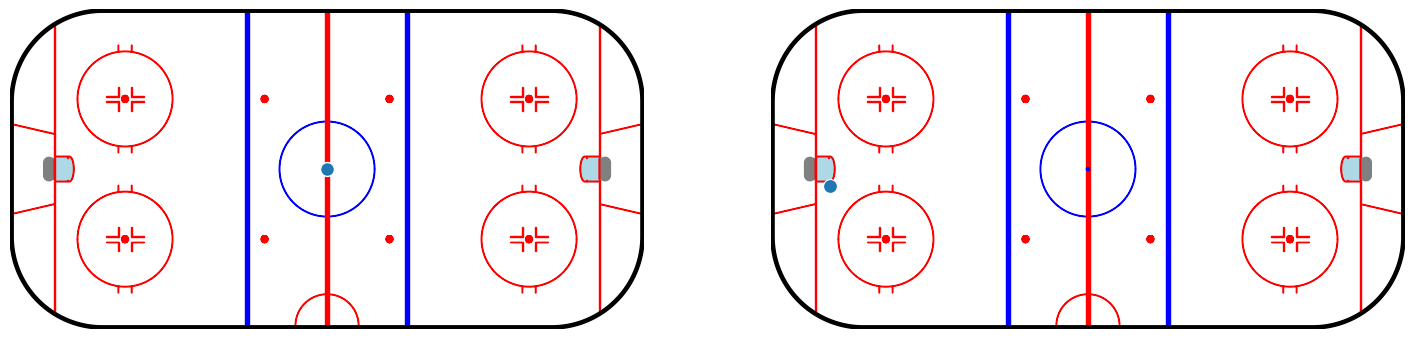

In [475]:
# plot shots on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=shots, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=shots, ax=axs[1])

<Axes: xlabel='RinkX', ylabel='RinkY'>

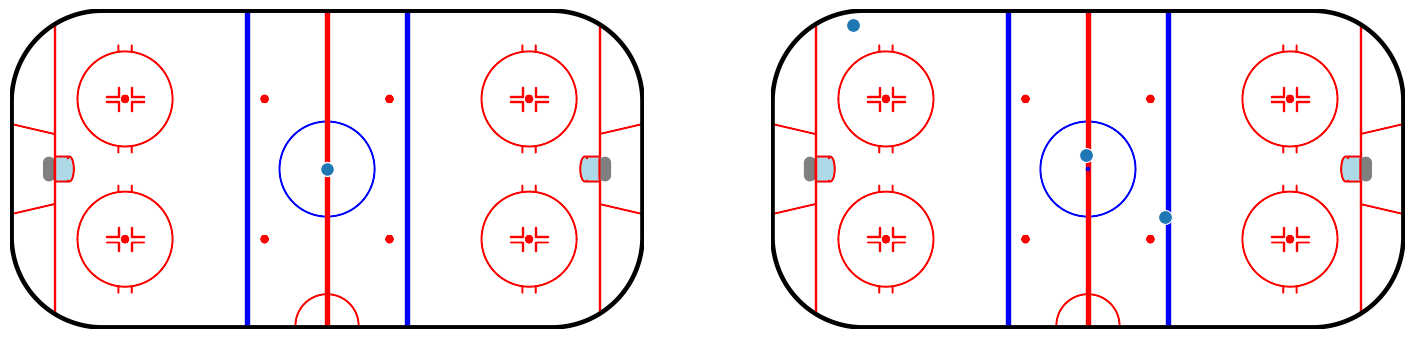

In [476]:
# plot passes on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=passE, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=passE, ax=axs[1])


<Axes: xlabel='x', ylabel='y'>

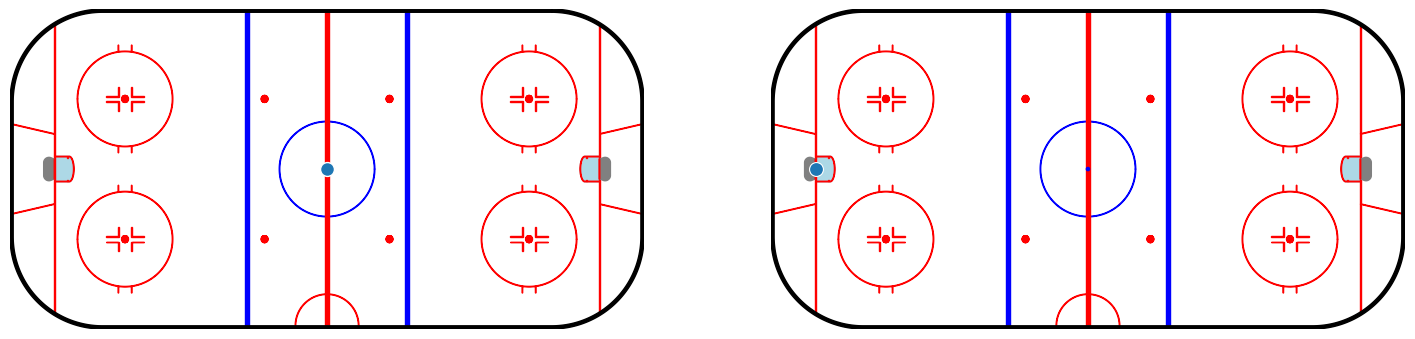

In [477]:
# plot Goals on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=passE, ax=axs[0])

# the coordinates of the board in the hockey_rink package for the IIHF rink are length 197 and width 98.4
goal_coords = pd.DataFrame({'x': [-26.0 * 3.2833], 'y': [0 *3.28]})

rink.plot_fn(sns.scatterplot, x='x', y='y',s=100, legend=False, data=goal_coords, ax=axs[1])

In [478]:
shots

,Unnamed: 0,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,...,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY,RinkX,RinkY
21,2670,2,1000,1704026154180,Shot,FullStrength,5v5,True,True,HomeTeamZone,...,"-0.798,0.602","0.098,-0.995","0.309,-0.951","0.598,-0.802",-24.7,-1.6,NaN,NaN,-81.09751,-5.248


In [479]:
passE

,Unnamed: 0,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,...,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY,RinkX,RinkY
7,2656,2,990,1704026144860,Pass,FullStrength,5v5,True,True,AwayTeamZone,...,"0.504,-0.863","0.292,0.957","-0.972,-0.237","0.595,0.804",7.4,-4.6,5.7,13.5,24.29642,-15.088
18,2667,2,999,1704026153540,Pass,FullStrength,5v5,True,True,HomeTeamZone,...,"-0.342,0.94","0.76,-0.65","0.712,-0.702","0.008,-1",-22.5,13.8,-24.2,-0.4,-73.87425,45.264
29,2678,2,1001,1704026207000,Pass,FullStrength,5v5,True,True,NeutralZone,...,"-0.922,0.388","-0.327,-0.945","0.376,-0.926","-0.673,-0.74",-0.2,1.3,-2.0,3.2,-0.65666,4.264


In [523]:

def distance_to_enemy_goal(X,Y,Team):
    
    rightGoal = [26.0,0.0]
    leftGoal = [-26.0, 0.0]
    
    if Team == 'Home':
        enemygoal = rightGoal
    
    if Team == 'Away':
        enemygoal = leftGoal
        
    return math.sqrt((enemygoal[0] - (X/ 3.2833))**2 + (enemygoal[1] - (Y/ 3.2833))**2)

def mean_distance_to_opponents(X,Y,Team, df: pd.DataFrame):
    
    distances_to_opponents = []
    main_player_team = ""
    opponent_team = ""
    
    if Team == 'Home':
        main_player_team = "Home"
        opponent_team = "Away"
    elif Team == 'Away':
        main_player_team = "Away"
        opponent_team = "Home"   
    else:
        print("Error: The team is neither home nor away.")
        
    for i in range(1, 12):
        if i == 1 or i == 7:
            continue

        coords_primary = [X,Y]
        float_coords_primary = [float(coord) for coord in coords_primary]
        
        if df[f'StartPlayerTeam{i}'] == opponent_team: 
            
            if type(df[f'StartPlayerCoordinates{i}']) == str:
                coords_opponent = df[f'StartPlayerCoordinates{i}'].split(',')

            elif type(df[f'StartPlayerCoordinates{i}']) == tuple:
                coords_opponent = df[f'StartPlayerCoordinates{i}']
                
            value = math.sqrt(((float_coords_primary[0]/ 3.2833) - float(coords_opponent[0])) ** 2 + ((float_coords_primary[1]/ 3.2833) - float(coords_opponent[1])) ** 2)
            distances_to_opponents.append(value)

    return sum(distances_to_opponents)/len(distances_to_opponents)


def plot_event(event):
    
    
    rink = hr.IIHFRink()
    
    rightGoal = [26.0 * 3.2833,0.0]
    leftGoal = [-26.0 * 3.2833, 0.0]
 

    if event['EventPrimaryTeam'] == "Home":
        enemygoal = rightGoal
        Team = 'Home'
        goal_coords = pd.DataFrame({'x': [26.0 * 3.2833], 'y': [0 * 3.28]})
    
    elif event['EventPrimaryTeam'] == "Away":
        enemygoal = leftGoal
        Team = 'Away'
        goal_coords = pd.DataFrame({'x': [-26.0 * 3.2833], 'y': [0 * 3.28]})
        
    else:
        print("Error: The team is neither home nor away.")
    
    playerPos = [event['RinkX'], event['RinkY']]
    
    radius = mean_distance_to_opponents(playerPos[0],playerPos[1], Team, event)
    
    distancetogoal = distance_to_enemy_goal(playerPos[0],playerPos[1], Team)
    
    print(f'Distance to goal: {distancetogoal}')
    print(f'Mean distance to opponents: {radius}')
    
    fig, ax = plt.subplots(figsize=(18, 8))
    # Hockeyfeld zeichnen
    rink.draw(ax=ax)
    
    # Formen zeichnen
    circle = plt.Circle((playerPos[0], playerPos[1]), radius, facecolor='#eeff41', fill=True, edgecolor='black')
    ax.add_patch(circle)
    
    line = plt.Line2D([playerPos[0], enemygoal[0]], [playerPos[1], enemygoal[1]], color='black', linewidth=2.5)

    ax.add_line(line)
    
    # Aktuelle Zeile plotten
    sns.scatterplot(x='RinkX', y='RinkY', s=100, edgecolor='white', data=pd.DataFrame([event]), color='darkgray', ax=ax)
    sns.scatterplot(x='x', y='y', data=goal_coords, color='purple', s=100, legend=False, ax=ax)
    

    
    plt.show()

Distance to goal: 14.223479711193361
Mean distance to opponents: 11.298383162574126


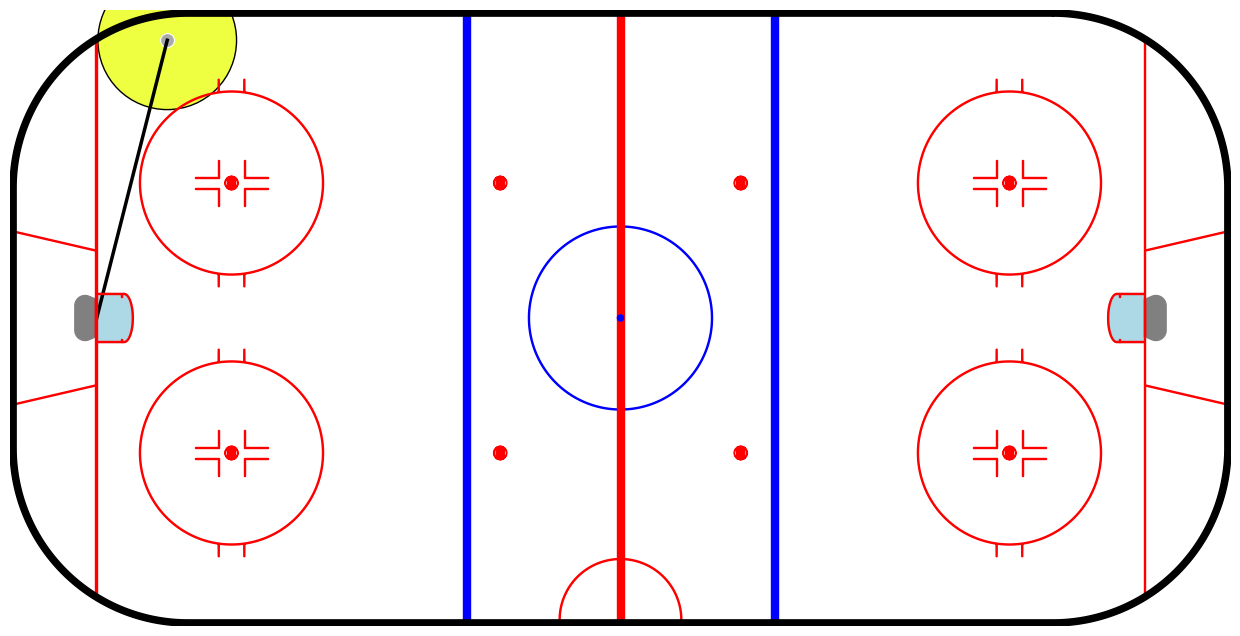

In [524]:
plot_event(passE.iloc[1])

Distance to goal: 2.0603049638382482
Mean distance to opponents: 7.511644121892506


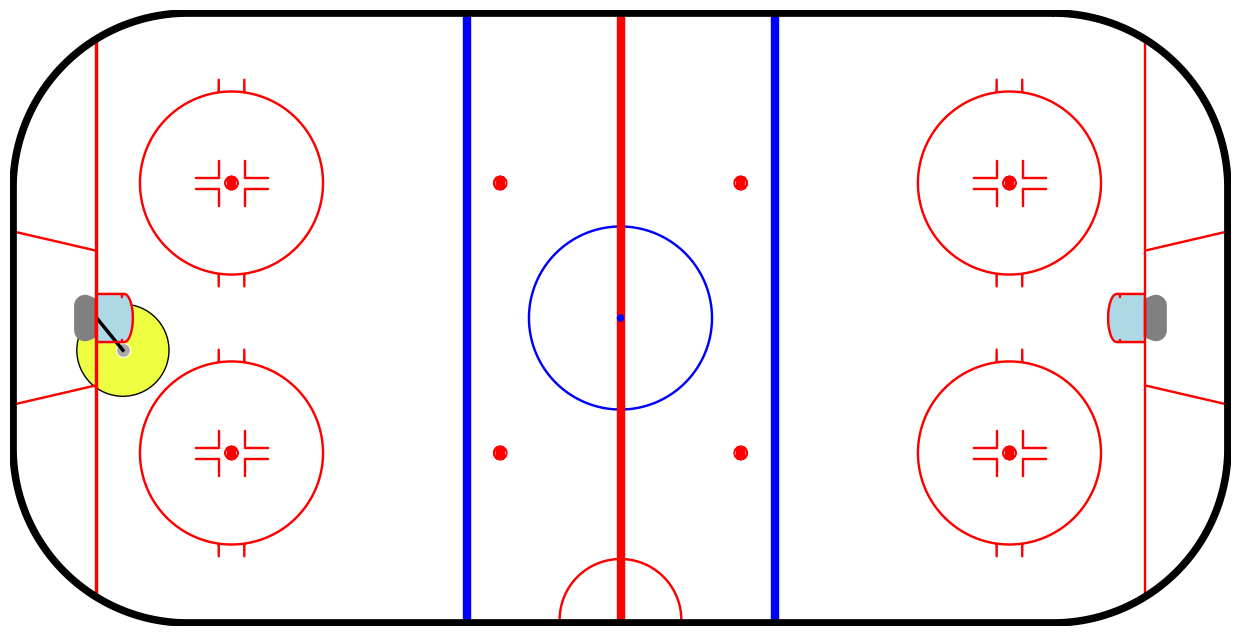

In [525]:
plot_event(shots.iloc[0])

In [518]:
shots

,Unnamed: 0,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,...,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY,RinkX,RinkY
21,2670,2,1000,1704026154180,Shot,FullStrength,5v5,True,True,HomeTeamZone,...,"-0.798,0.602","0.098,-0.995","0.309,-0.951","0.598,-0.802",-24.7,-1.6,NaN,NaN,-81.09751,-5.248


In [483]:
passE.iloc[1]

Unnamed: 0              2667
Period                     2
MatchClock               999
Timestamp      1704026153540
EventType               Pass
                   ...      
EventStartY             13.8
EventEndX              -24.2
EventEndY               -0.4
RinkX              -73.87425
RinkY                 45.264
Name: 18, Length: 121, dtype: object

In [ ]:
df04 = passE.iloc[1]

df04[]

In [500]:
df03 = passE.iloc[1]

Team = passE.iloc[1]['EventPrimaryTeam']    

if Team == 'Home':
    main_player_team = "Home"
    opponent_team = "Away"
elif Team == 'Away':
    main_player_team = "Away"
    opponent_team = "Home"   
else:
    print("Error: The team is neither home nor away.")
    
print(Team)

HomeListX= []
HomeListY = []
AwayListX = []
AwayListY = []

df04 = passE.iloc[1]


for i in range(1, 12):

    if df[f'StartPlayerTeam{i}'] == "Home":
        print(df03[f'StartPlayerCoordinates{i}'])
        HomePositionsX, HomePositionsY = df03[f'StartPlayerCoordinates{i}']
        HomeListX.append(HomePositionsX)
        HomeListY.append(HomePositionsY)
                
    elif df[f'StartPlayerTeam{i}'] == "Away":
        print(df03[f'StartPlayerCoordinates{i}'])
        AwayPositionsX, AwayPositionsY = df03[f'StartPlayerCoordinates{i}']
        AwayListX.append(HomePositionsX)
        AwayListY.append(HomePositionsY)
        
passE.iloc[1]

Away


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Logic Functions

In [112]:
#X, Y, Team from MainPlayer
def distance_to_enemy_goal(X,Y,Team):
    
    rightGoal = [26.0,0.0]
    leftGoal = [-26.0, 0.0]
    
    if Team == 'Home':
        enemygoal = rightGoal
    
    if Team == 'Away':
        enemygoal = leftGoal
        
    return math.sqrt((enemygoal[0] - X)**2 + (enemygoal[1] - Y)**2)

distance_to_enemy_goal(-3,0,'Away')
    
    

23.0

In [268]:
# X, Y, Team from MainPlayer and dataframe from Topic all Players
def mean_distance_to_opponents(X,Y,Team, df: pd.DataFrame):
    
    distances_to_opponents = []
    main_player_team = ""
    opponent_team = ""
    
    if Team == 'Home':
        main_player_team = "Home"
        opponent_team = "Away"
    elif Team == 'Away':
        main_player_team = "Away"
        opponent_team = "Home"   
    else:
        print("Error: The team is neither home nor away.")
        
    for i in range(1, 12):

        coords_primary = [X,Y]
        float_coords_primary = [float(coord) for coord in coords_primary]
        
        if df[f'StartPlayerTeam{i}'] == opponent_team: 
            
            if type(df[f'StartPlayerCoordinates{i}']) == str:
                coords_opponent = df[f'StartPlayerCoordinates{i}'].split(',')

            elif type(df[f'StartPlayerCoordinates{i}']) == tuple:
                coords_opponent = df[f'StartPlayerCoordinates{i}']
                
            value = math.sqrt((float_coords_primary[0] - float(coords_opponent[0])) ** 2 + (float_coords_primary[1] - float(coords_opponent[1])) ** 2)
            distances_to_opponents.append(value)

    return sum(distances_to_opponents)/len(distances_to_opponents)
